<a href="https://colab.research.google.com/github/junsoo321/public-repository/blob/main/5%EC%A3%BC%EC%B0%A8%20%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


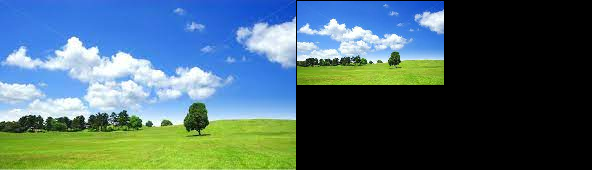

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
import glob

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/MyDrive/test.jpg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_ > 0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0),img.item(y_,x_,0))
      dst.itemset((y,x,1),img.item(y_,x_,1))
      dst.itemset((y,x,2),img.item(y_,x_,2))


result=cv2.hconcat([img,dst])
cv2_imshow(result)